# Storytelling Data Visualization on Exchange Rates

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).

Dataset is exported from this [Kaggle dataset.](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020)

# Introducing the Dataset

We will import pandas library to work with DataFrames and Matplotlib to visualize data using graphs. 

Then import the dataset as CSV file and explore it understand the data. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
exchange_rates = pd.read_csv("C:/Users/Linus/Documents/Sheets/euro-daily-hist.csv")
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6311 non-null   object 
 1   [Australian dollar ]      6311 non-null   object 
 2   [Bulgarian lev ]          5909 non-null   object 
 3   [Brazilian real ]         6043 non-null   object 
 4   [Canadian dollar ]        6311 non-null   object 
 5   [Swiss franc ]            6311 non-null   object 
 6   [Chinese yuan renminbi ]  6043 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6311 non-null   object 
 9   [Danish krone ]           6311 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6311 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6311 non-null   object 
 14  [Croatia

In [2]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-05-26,1.6439,1.9558,5.3878,1.4630,0.9707,7.5874,NaN,23.648,7.4489,...,4.9572,NaN,11.5280,1.4520,NaN,NaN,37.2630,21.5340,1.0751,21.0148
1,2023-05-25,1.6443,1.9558,5.3320,1.4599,0.9708,7.5891,NaN,23.645,7.4502,...,4.9495,NaN,11.5490,1.4515,NaN,NaN,37.1540,21.3944,1.0735,20.7466
2,2023-05-24,1.6402,1.9558,5.3397,1.4600,0.9732,7.6005,NaN,23.671,7.4477,...,4.9614,NaN,11.5103,1.4526,NaN,NaN,37.1710,21.4487,1.0785,20.7479
3,2023-05-23,1.6282,1.9558,5.3649,1.4571,0.9718,7.6039,NaN,23.681,7.4475,...,4.9720,NaN,11.4494,1.4527,NaN,NaN,37.4350,21.3993,1.0779,20.7920
4,2023-05-22,1.6294,1.9558,5.4056,1.4618,0.9700,7.6067,NaN,23.676,7.4478,...,4.9737,NaN,11.3765,1.4554,NaN,NaN,37.2820,21.4629,1.0822,20.9137


# Data Cleaning

After understading the data, we found out that column names are harder to work with, so we will rename them. 

In [3]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                              'Period\\Unit:': 'Time'}, 
                     inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

# USD/EUR

In this project, we will limit ourselves to conversion rates between US Dollars & Euro. So we will copy them to new DataFrame and explore it. We will perform other data cleaning actions such as filtering out unavailable conversion values and converting available values to to float datatype.

In [4]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar.head()

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659


In [5]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6311 non-null   datetime64[ns]
 1   US_dollar  6311 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 98.7+ KB


In [6]:
euro_to_dollar.describe()

C:\Users\Linus\AppData\Local\Temp\ipykernel_9152\1217395770.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  euro_to_dollar.describe()


,Time,US_dollar
count,6311,6311
unique,6311,3734
top,1999-01-04 00:00:00,-
freq,1,62
first,1999-01-04 00:00:00,NaN
last,2023-05-26 00:00:00,NaN


In [7]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6310
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6249 non-null   datetime64[ns]
 1   US_dollar  6249 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 146.5 KB


In [8]:
euro_to_dollar.describe()

,US_dollar
count,6249.000000
mean,1.190998
std,0.157995
min,0.825200
25%,1.089900
50%,1.184800
75%,1.309300
max,1.599000


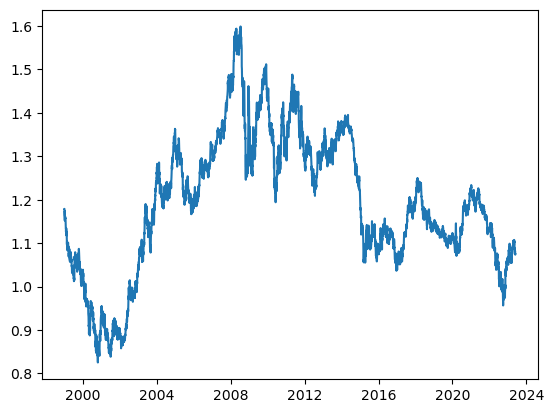

In [9]:
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

# Rolling Mean

We plotted USD/EUR conversion rate vs time using line graph. If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles represent the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

We will use the rolling mean and plot varaiations over a week, month, 50 days, 100 days and a year. 

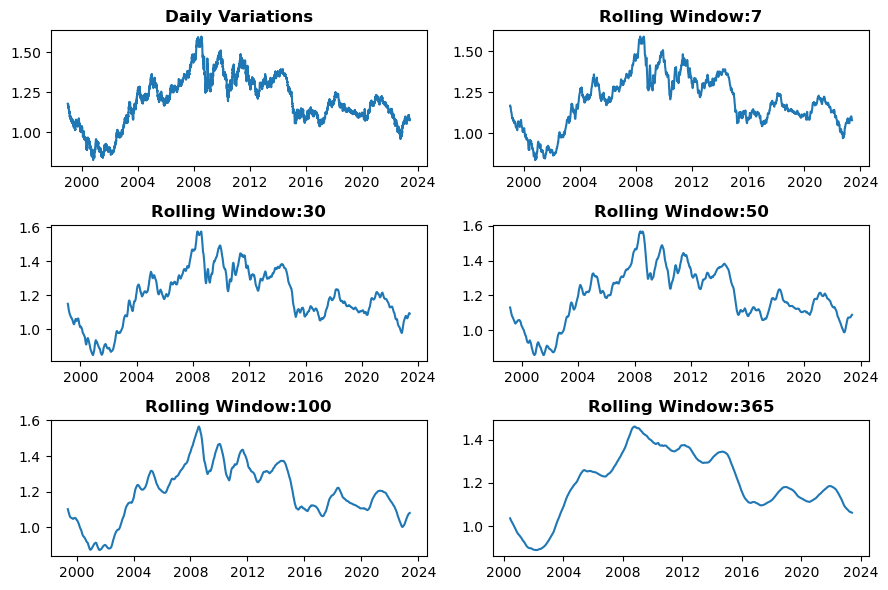

In [11]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Daily Variations', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')

plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

# Conclusion

Now, we can clearly visualize the USD/EUR conversion history from 2000 to 2004